<h1><center>Spring 2019CSCE-629 Project</center></h1>
<div style="text-align: center"> Rui Kou, 923006438 </div>





In [13]:
import collections
import random
import numpy as np
import matplotlib.pyplot as plt
import time

#### Define Graph using Linkedlist data structure and generating sparse and dense graph

In [2]:
class Graph:
    def __init__(self,x):
        self.Vertices = x
        self.Weight = collections.defaultdict(int)
        self.LinkedList = collections.defaultdict(set)
        self.Edges = x-1
        for i in range(x-1):
            self.LinkedList[i].add(i+1)
            self.LinkedList[i+1].add(i)
            _w = random.randrange(1,100) 
            self.Weight[tuple([i,i+1])] = _w
            self.Weight[tuple([i+1,i])] = _w

    def sparse_graph(self):
        total_edges = self.Vertices*3
        #print(total_edges)
        while self.Edges < total_edges:
            v = random.randrange(self.Vertices)
            w = random.randrange(self.Vertices)
            if v != w and w not in self.LinkedList[v]:
                #print(v,w)
                self.LinkedList[v].add(w)
                self.LinkedList[w].add(v)
                self.Edges +=1
                #print(self.Edges)
                _w = random.randrange(1,100) 
                self.Weight[tuple([v,w])] = _w
                self.Weight[tuple([w,v])] = _w
                    
    def dense_graph(self):
        for v in range(self.Vertices):
            for w in range(v+1,self.Vertices):
                if w not in self.LinkedList[v] and random.uniform(0,1)<=0.2:
                    self.LinkedList[v].add(w)
                    self.LinkedList[w].add(v)
                    self.Edges +=1    
                    _w = random.randrange(1,100) 
                    self.Weight[tuple([v,w])] = _w
                    self.Weight[tuple([w,v])] = _w

#### Generating 5 sparse graph with average vertex degree of 6

In [8]:
g1_s = Graph(5000)
g1_s.sparse_graph()

g2_s = Graph(5000)
g2_s.sparse_graph()

g3_s = Graph(5000)
g3_s.sparse_graph()

g4_s = Graph(5000)
g4_s.sparse_graph()

g5_s = Graph(5000)
g5_s.sparse_graph()

#### Generate 5 dense graphs, in which each vertex is adjacent to 20% of other vertices

In [9]:
g1_d = Graph(5000)
g1_d.dense_graph()

g2_d = Graph(5000)
g2_d.dense_graph()

g3_d = Graph(5000)
g3_d.dense_graph()

g4_d = Graph(5000)
g4_d.dense_graph()

g5_d = Graph(5000)
g5_d.dense_graph()

#### Plot number of edge distribution for sparse graph. It shows the distribution peaks at 6, which proved our implementation of sparse graph

(array([  0.,   0., 100., 362., 763., 934., 985., 778., 527., 280., 150.,
        108.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]),
 <a list of 12 Patch objects>)

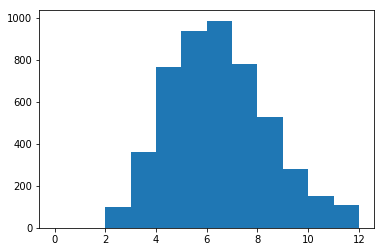

In [10]:
a = []
for key in g1_s.LinkedList:
    a.append(len(g1_s.LinkedList[key]))
plt.hist(a, bins = np.linspace(0,12,13))

#### Plot number of edge distribution for dense graph. It shows the distribution peaks at 1000, which proved our implementation of dense graph

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 3.200e+01, 1.300e+02, 4.840e+02,
        1.063e+03, 1.449e+03, 1.116e+03, 5.500e+02, 1.430e+02, 3.000e+01,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

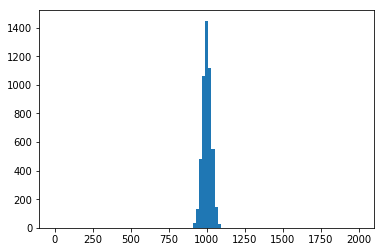

In [11]:
a = []
for key in g1_d.LinkedList:
    a.append(len(g1_d.LinkedList[key]))
plt.hist(a, bins = np.linspace(0,2000,100))

#### Dijkstra Algorithm without using a heap structure, the time complexity is $O(n^{2}$)

In [18]:
 def Dijkstra_n2(g1,s):
    status =[0]*g1.Vertices
    bw = [0]*g1.Vertices
    dad = [-1]*g1.Vertices
    for i in range(g1.Vertices):
        status[i]='unseen'
    status[s] = 'intree'
    bw[s] = 9999
    for v in g1.LinkedList[s]:
        status[v] = 'fringe'
        bw[v] = g1.Weight[s,v]
        dad[v] = s
    while 'fringe' in status:
        max_bw = 0
        for i in range(len(status)):
            if status[i]=='fringe' and bw[i]>max_bw:
                max_bw = bw[i]
                idx = i
        v = idx
        status[v] = 'intree'
        for w in g1.LinkedList[v]:
            if status[w]=='unseen':
                status[w] = 'fringe'
                dad[w]=v
                bw[w]=min(bw[v],g1.Weight[v,w])
            elif status[w]=='fringe' and bw[w]<min(bw[v],g1.Weight[v,w]):
                dad[w]=v
                bw[w]=min(bw[v],g1.Weight[v,w])
    return bw,dad

In [19]:
t0 = time.time()
Maxbw, Route = Dijkstra_n2(g1,1)
t1 = time.time()
total = t1-t0
print(total)

4.344483137130737


In [15]:
class MaxHeap:
    def __init__(self,items = []):
        super().__init__() # calling parent __init__
        self.heap = [(0,-1)]
        for i in items:
            self.heap.append(i)
            self.__floatUp(len(self.heap)-1)
            
    def push(self, data):
        self.heap.append(data)
        self.__floatUp(len(self.heap) - 1)
        
    def peek(self):
        if self.heap[1]:
            return self.heap[1]
        else:
            return False
            
    def pop(self):
        if len(self.heap)>2:
            self.__swap(1,len(self.heap)-1)
            max = self.heap.pop() # remove the last on the list
            self.__bubbleDown(1)
            
        elif len(self.heap) ==2:
            max = self.heap.pop()
        else:
            max = False
        return max
    
    def delete(self,w):
        for i in range(len(self.heap)):
            if self.heap[i][1] ==w:
                self.__swap(i,len(self.heap)-1)
                self.__bubbleDown(i)     
        
    def __swap(self,i,j): # __internal functions
        self.heap[i],self.heap[j] = self.heap[j],self.heap[i]
    
    def __floatUp(self,index):
        parent = index//2 # '//' floor division
        if index <= 1:
            return
        elif self.heap[index][0]>self.heap[parent][0]:
            self.__swap(index,parent)
            self.__floatUp(parent)
        
    def __bubbleDown(self, index):
        left = index *2
        right = index*2 +1
        largest = index
        if len(self.heap)>left and self.heap[largest][0]<self.heap[left][0]:
            largest = left
        if len(self.heap)>right and self.heap[largest][0] < self.heap[right][0]:
            largest = right
        if largest !=index:
            self.__swap(index,largest)
            self.__bubbleDown(largest)

#### Dijkstra with MaxHeap

In [16]:
def MaxHeap_Dijkstra(g1,s):
    status =[0]*g1.Vertices
    bw = [0]*g1.Vertices
    dad = [-1]*g1.Vertices
    for i in range(g1.Vertices):
        status[i]='unseen'
    status[s] = 'intree'
    bw[s] = 9999
    H = MaxHeap()
    for v in g1.LinkedList[s]:
        status[v] = 'fringe'
        bw[v] = g1.Weight[s,v]
        dad[v] = s
        H.push((bw[v],v))
    while H.heap!=[(0,-1)]:
            v = H.peek()[1]
            H.pop()
            status[v] = 'intree'
            for w in g1.LinkedList[v]:
                if status[w]=='unseen':
                    status[w] = 'fringe'
                    dad[w]=v
                    bw[w]=min(bw[v],g1.Weight[v,w])
                    H.push((bw[w],w))
                elif status[w]=='fringe' and bw[w]<min(bw[v],g1.Weight[v,w]):
                    H.delete(w)
                    dad[w]=v
                    bw[w]=min(bw[v],g1.Weight[v,w])
                    H.push((bw[w],w))
    return bw,dad

In [115]:
bw,dad = MaxHeap_Dijkstra(g1,1)

In [116]:
bw

[55, 9999, 55, 55, 55, 55, 55, 52, 55, 55]

In [117]:
dad

[9, -1, 3, 1, 3, 9, 2, 6, 2, 3]

#### Kruskal algorithm

In [20]:
class HeapSort:
    def __init__(self,items = []):
        super().__init__() # calling parent __init__
        self.heap = [(0,-1,-1)]
        for i in items:
            self.heap.append(i)
            self.__floatUp(len(self.heap)-1)
            
    def push(self, data):
        self.heap.append(data)
        self.__floatUp(len(self.heap) - 1)
        
    def peek(self):
        if self.heap[1]:
            return self.heap[1]
        else:
            return False
            
    def pop(self):
        if len(self.heap)>2:
            self.__swap(1,len(self.heap)-1)
            max = self.heap.pop() # remove the last on the list
            self.__bubbleDown(1)
            
        elif len(self.heap) ==2:
            max = self.heap.pop()
        else:
            max = False
        return max
    ''' obsolete
    def delete(self,w):
        for i in range(len(self.heap)):
            if self.heap[i][1] ==w:
                self.__swap(i,len(self.heap)-1)
                self.__bubbleDown(i)     
    '''   
    def __swap(self,i,j): # __internal functions
        self.heap[i],self.heap[j] = self.heap[j],self.heap[i]
    
    def __floatUp(self,index):
        parent = index//2 # '//' floor division
        if index <= 1:
            return
        elif self.heap[index][0]>self.heap[parent][0]:
            self.__swap(index,parent)
            self.__floatUp(parent)
        
    def __bubbleDown(self, index):
        left = index *2
        right = index*2 +1
        largest = index
        if len(self.heap)>left and self.heap[largest][0]<self.heap[left][0]:
            largest = left
        if len(self.heap)>right and self.heap[largest][0] < self.heap[right][0]:
            largest = right
        if largest !=index:
            self.__swap(index,largest)
            self.__bubbleDown(largest)

In [124]:
hs = HeapSort()
for pair in g1.Weight:
    if pair[0]< pair[1]:
        _w = g1.Weight[pair[0],pair[1]]
        hs.push((_w,pair[0],pair[1]))
hs.heap

[(0, -1, -1),
 (99, 3, 4),
 (91, 4, 6),
 (89, 2, 8),
 (84, 0, 9),
 (71, 5, 9),
 (71, 0, 4),
 (69, 6, 9),
 (59, 8, 9),
 (68, 2, 3),
 (50, 4, 5),
 (61, 2, 6),
 (54, 0, 1),
 (53, 1, 8),
 (52, 6, 7),
 (57, 5, 8),
 (42, 1, 2),
 (55, 1, 3),
 (46, 7, 8),
 (61, 3, 9),
 (42, 3, 8),
 (25, 3, 7),
 (28, 3, 6),
 (37, 1, 9),
 (18, 5, 6),
 (41, 0, 7),
 (39, 4, 9),
 (6, 2, 5),
 (5, 4, 7),
 (38, 2, 4),
 (56, 0, 6)]

In [125]:
#Make set v
P = [-1]*g1.Vertices
rank = [0]*g1.Vertices
def Find(v):
    cur = v
    while P[cur]!=-1:
        cur = P[cur]
    return cur
def Union(r1,r2):
    if rank[r1]>rank[r2]:
        P[r2]=r1
    elif rank[r1]<rank[r2]:
        P[r1]=r2
    else:
        P[r1]=r2

In [126]:
T = collections.defaultdict(set)
while hs.heap != [(0,-1,-1)]:
    ei = hs.pop()
    ui,vi = ei[1],ei[2]
    r1 = Find(ui)
    r2 = Find(vi)
    if r1!=r2:
        Union(r1,r2)
        T[ui].add(vi)
        T[vi].add(ui)

In [127]:
T

defaultdict(set,
            {3: {1, 2, 4},
             4: {0, 3, 6},
             6: {4, 7},
             2: {3, 8},
             8: {2},
             0: {4, 9},
             9: {0, 5},
             5: {9},
             1: {3},
             7: {6}})

In [40]:
queue = collections.deque()
queue.append(3)
queue.append(5)
print(queue)
a = queue.popleft()
print(queue)
print(a)

deque([3, 5])
deque([5])
3


In [88]:
'''def BFS(T,s):
    dad = [-1]*g1.Vertices
    visited=[False]*g1.Vertices
    queue = collections.deque()
    visited[s]=True
    for w in T[s]:
        visited[w]=True
        queue.append(w)
        dad[w]=s
    while queue:
        print(visited)
        v = queue.popleft()
        for w in T[v]:
            if visited[w]==False:
                visited[w]=True
                queue.append(w)
                dad[w]=v
    return dad
'''

In [99]:
T

defaultdict(set,
            {1: {0, 3},
             3: {1, 4},
             4: {3, 5, 6},
             5: {2, 4},
             6: {4, 9},
             2: {5},
             0: {1, 7},
             9: {6},
             7: {0, 8},
             8: {7}})

In [141]:
def DFS_main(T,s,g1):
    dad = [-1]*g1.Vertices
    visited=[False]*g1.Vertices
    MBP = [0]*g1.Vertices
    MBP[s]=9999
    DFS(T,s,visited,dad,g1,MBP)
    #print (MBP)
    return dad,MBP

def DFS(T,v,visited,dad,g1,MBP):
    visited[v]=True
    for w in T[v]:
        if visited[w]==False:
            print(visited)
            dad[w]=v
            MBP[w]=min(MBP[v],g1.Weight[w,v])
            DFS(T,w,visited,dad,g1,MBP)

In [142]:
path, mbp= DFS_main(T,1,g1)

[False, True, False, False, False, False, False, False, False, False]
[False, True, False, True, False, False, False, False, False, False]
[False, True, True, True, False, False, False, False, False, False]
[False, True, True, True, False, False, False, False, True, False]
[False, True, True, True, True, False, False, False, True, False]
[True, True, True, True, True, False, False, False, True, False]
[True, True, True, True, True, False, False, False, True, True]
[True, True, True, True, True, True, False, False, True, True]
[True, True, True, True, True, True, True, False, True, True]


In [135]:
path

[4, -1, 3, 1, 3, 9, 4, 6, 2, 0]

In [143]:
mbp

[55, 9999, 55, 55, 55, 55, 55, 52, 55, 55]

In [283]:
for i in range(len(H.heap)):
    print(H.heap[i][1])

0
2
1
3
4
